In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = r"./Mask_Predictions/mask_predictions_065.json"
json_dict = dict()
with open(path,"r") as f:
    json_dict = json.load(f)

axis = []

for term in json_dict:
    one_set_axis = [float(num) for num in term["bbox"].split()]
    axis.append(one_set_axis)

In [3]:
axis = np.array(axis)

In [4]:
axis

array([[  0.,  43.,  18.,  65.],
       [307., 178., 345., 224.],
       [ 71.,  72.,  89.,  88.],
       ...,
       [382.,   0., 397.,   9.],
       [271.,  75., 287.,  94.],
       [115.,  55., 143.,  91.]])

In [5]:
length_height_ratios = []
sizes = []
# here I use length/height as the ratio
for row in axis:
    length_height_ratios.append((row[2] - row[0])/(row[3]-row[1]))
    sizes.append((row[2] - row[0])*(row[3]-row[1]))

In [6]:
avg_ratio = np.mean(length_height_ratios)

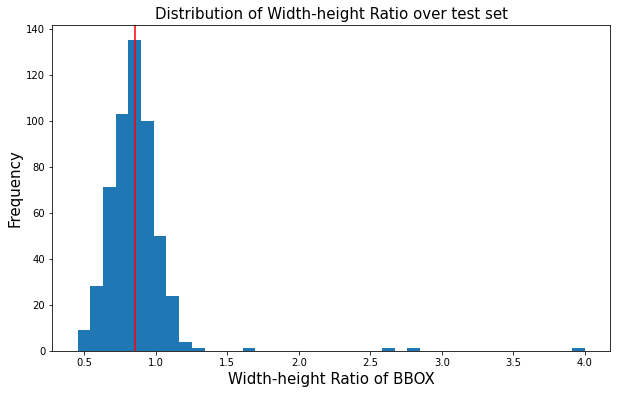

In [7]:
plt.figure(figsize = (10, 6))
plt.hist(length_height_ratios, bins = 40)
plt.xlabel("Width-height Ratio of BBOX", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Distribution of Width-height Ratio over test set", fontsize = 15)
plt.axvline(x=avg_ratio, c = "r")
plt.savefig("./result_yolov3/width_height_ratio_065.jpg",dpi = 300, bbox_inches = "tight")

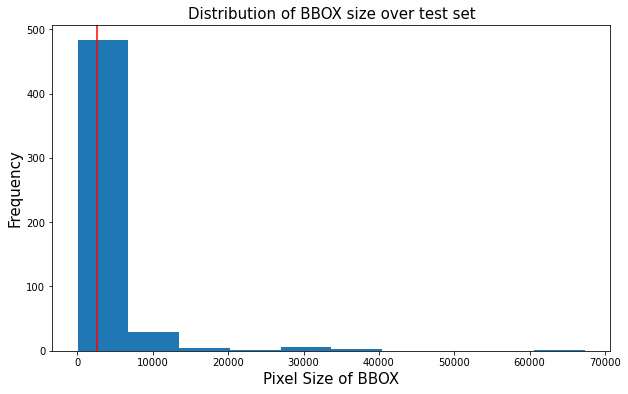

In [8]:
plt.figure(figsize = (10,6))
plt.hist(sizes)
plt.xlabel("Pixel Size of BBOX", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Distribution of BBOX size over test set", fontsize = 15)
plt.axvline(x=np.mean(sizes), c = "r")
plt.savefig("./result_yolov3/bbox_size_065.jpg",dpi = 300, bbox_inches = "tight")

/Users/guanzhaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

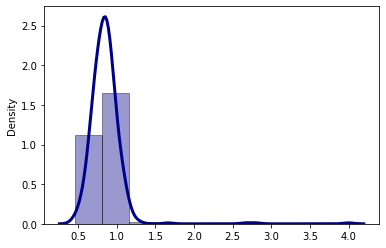

In [9]:
sns.distplot(length_height_ratios, 
             hist=True, 
             kde=True, 
             color = 'darkblue',  
             bins = 10,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})

/Users/guanzhaoli/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

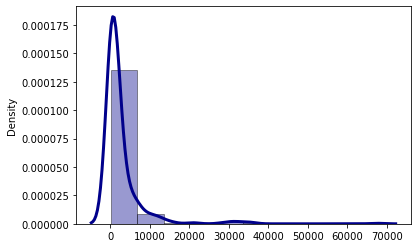

In [10]:
sns.distplot(sizes, 
             hist=True, 
             kde=True, 
             color = 'darkblue',  
             bins = 10,
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3})